In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import pi, e, hbar, m_e, c, epsilon_0

fontsize = 12
fontsize14 = 14

# in linux
# ########
#simulation_path = "/home/novac/Desktop/Projects/autorun_qv3d/temp/density-5.0e15"

# in windows
# ##########
simulation_path = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "SCARF", "density-7e14")

# witness parameters

In [54]:
csvFile = os.path.join(simulation_path, "h5files", "witness_parameters.csv")

# Load the DataFrame from a CSV file
df = pd.read_csv(csvFile)

# Display the first few rows of the DataFrame
print(df.head(10))


          phase       wmy       wmz      wmvy          wmvz  stdev_y  stdev_z  \
0  1.000000e-10  0.102215  0.198594 -0.000082 -2.274960e-06  10.3623  10.5214   
1  2.500000e+02 -0.350421  0.388444  0.000125 -9.048060e-07  11.4957  10.2354   
2  5.000000e+02 -1.396470  1.384430  0.000083 -3.625850e-05  12.8333  12.3406   
3  7.500000e+02  0.823066  2.349290 -0.000030 -1.745420e-05  13.9273  13.8720   
4  1.000000e+03 -0.505762  2.633830  0.000005  7.214580e-05  15.7471  14.3328   
5  1.250000e+03 -0.248081  1.451110 -0.000004  1.418890e-04  17.9086  15.7272   

   stdev_vy  stdev_vz      em_y      em_z      wmg  stdev_g       N  \
0  0.001065  0.001016   5.39177   5.21874  488.381  23.9825  5696.0   
1  0.001656  0.001631   9.39583   8.28089  497.659  24.0101  5696.0   
2  0.001508  0.001446   9.70989   9.06065  508.633  24.0273  5696.0   
3  0.001432  0.001303  10.34670   9.33896  519.778  24.0586  5696.0   
4  0.001351  0.001311  11.25470   9.93782  530.749  24.1021  5696.0   
5  0.0

In [55]:
df['lamdap'] = df['lamdap'] * 0.01 # wavlenght in metere
wavelength = float(df['lamdap'][0])
#print(f"{wavelength:.2e}")

wp = 2*pi*c/wavelength
kp = wp/c
density = wp**2 * epsilon_0 * m_e / e**2
print(f"{density/1e6:.2e}")

7.00e+14


In [56]:
df['phase'] = df['phase'] * c/wp * 100 # distance in cm

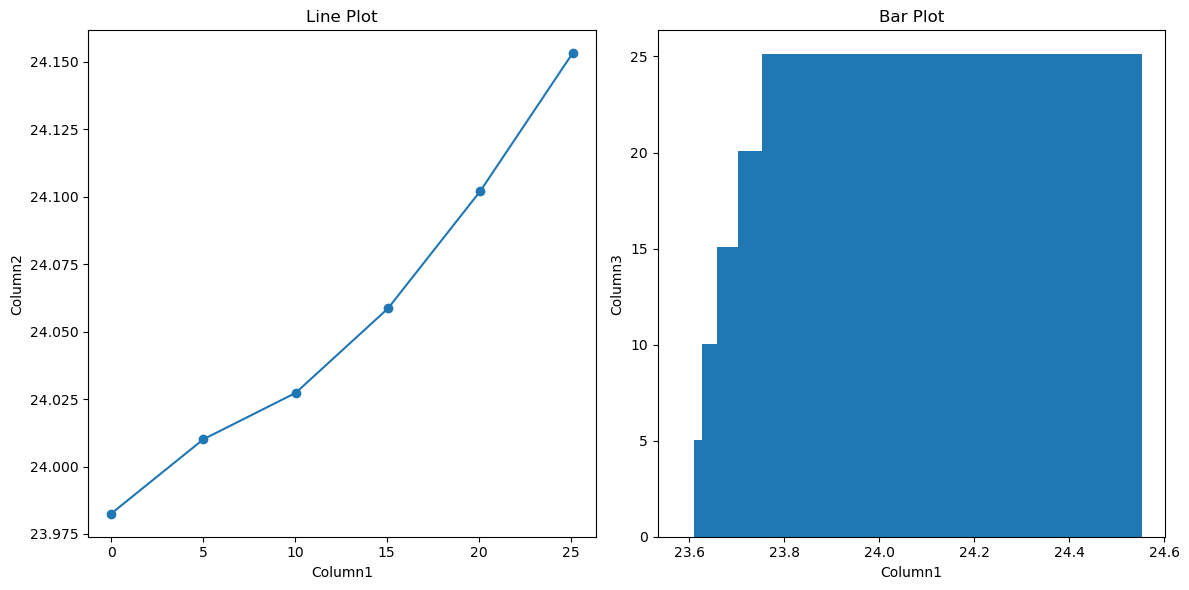

In [58]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(df['phase'], df['stdev_g'], marker='o')
plt.title('Line Plot')
plt.xlabel('Column1')
plt.ylabel('Column2')

# Bar plot
plt.subplot(1, 2, 2)
plt.bar(df['stdev_g'], df['phase'])
plt.title('Bar Plot')
plt.xlabel('Column1')
plt.ylabel('Column3')

# Show plots
plt.tight_layout()
plt.show()

In [4]:
phase = parameters[0]
wmy =  parameters[1]
wmz = parameters[2]
wmvy = parameters[3]
wmvz = parameters[4]
stdev_y = parameters[5]
stdev_z = parameters[6]
stdev_vy = parameters[7]
stdev_vz = parameters[8]
em_y = parameters[9]
em_z = parameters[10]
wmg = parameters[11]       # gamma
stdev_g = parameters[12]   # Dgamma
N = parameters[13]
W = parameters[14]         # calculate charge
lamdap = parameters[15]/100    # [cm]

NameError: name 'parameters' is not defined